In [2]:
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from matplotlib import pyplot as plt
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
api_key = os.getenv("QUANDL_API_KEY")
type(api_key)

str

In [5]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [6]:
my_btc = 1.2
my_eth = 5.3

In [7]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
btc_url = btc_url + "?format=json"
requests.get(btc_url)

<Response [200]>

In [9]:
eth_url = eth_url + "?format=json"
requests.get(eth_url)

<Response [200]>

In [10]:
btc_url = btc_url + api_key
btc_url

'https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?format=json1kb15AyQUv_z8SLzuEmq'

In [11]:
eth_url = eth_url + api_key
eth_url

'https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD?format=json1kb15AyQUv_z8SLzuEmq'

In [12]:
btc_response = requests.get(btc_url).json()
requests.get(btc_url)
print(json.dumps(btc_response, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18605206,
            "total_supply": 18605206,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 36239.0,
                    "volume_24h": 53398625072,
                    "market_cap": 674005583671,
                    "percentage_change_1h": 0.260906737649219,
                    "percentage_change_24h": -1.47705654732845,
                    "percentage_change_7d": 6.77929565372435,
                    "percent_change_1h": 0.260906737649219,
                    "percent_change_24h": -1.47705654732845,
                    "percent_change_7d": 6.77929565372435
                }
            },
            "last_updated": 1611106219
        }
    },
    "metadata": {
        "timestamp": 1611106219,
        "num_crypt

In [13]:
eth_response = requests.get(eth_url).json()
requests.get(eth_url)
print(json.dumps(eth_response, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114323000,
            "total_supply": 114323000,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1392.07,
                    "volume_24h": 53497806465,
                    "market_cap": 159287137270,
                    "percentage_change_1h": -0.465418811776203,
                    "percentage_change_24h": 7.11146188813801,
                    "percentage_change_7d": 33.1605530266043,
                    "percent_change_1h": -0.465418811776203,
                    "percent_change_24h": 7.11146188813801,
                    "percent_change_7d": 33.1605530266043
                }
            },
            "last_updated": 1611106264
        }
    },
    "metadata": {
        "timestamp": 1611106264,
        "num_cr

In [14]:
btc_price = btc_response['data']['1']['quotes']['USD']['price']
print(btc_price)
#btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]

36239.0


In [15]:
my_btc_value = btc_price * my_btc
print(my_btc_value)

43486.799999999996


In [16]:
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
print(eth_price)

1392.07


In [17]:
my_eth_value = eth_price * my_eth
print(my_eth_value)

7377.971


In [18]:
# Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [19]:
shares_data = {
    "shares": [50, 200]
}

tickers = ["SPY", "AGG"]

df_shares = pd.DataFrame(shares_data, index=tickers)
df_shares

,shares
SPY,50
AGG,200


In [20]:
load_dotenv()

True

In [21]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [22]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
#print(alpaca_api_key)
#print(alpaca_secret_key)

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [23]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [24]:
start = pd.Timestamp("2020-01-17", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-01-17", tz="America/New_York").isoformat()

In [25]:
timeframe = "1D"

In [26]:
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

df_portfolio.head(5)

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2020-01-17 00:00:00-05:00  113.02  113.096  112.97  113.08  2921470  331.70   
2020-01-21 00:00:00-05:00  113.25  113.410  113.22  113.37  7641226  330.90   
2020-01-22 00:00:00-05:00  113.44  113.490  113.39  113.44  5049890  332.24   
2020-01-23 00:00:00-05:00  113.64  113.700  113.58  113.59  6653596  330.63   
2020-01-24 00:00:00-05:00  113.68  113.890  113.67  113.80  4588656  332.44   

                                                                
                             high       low   close     volume  
time                                                            
2020-01-17 00:00:00-05:00  332.18  330.8539  332.01   58361137  
2020-01-21 00:00:00-05:00  332.18  330.8200  331.31  100931060  
2020-01-22 00:00:00-05:00  332.95  331.1700  331.39   82090529  
2020-01-23 00:00:00-05:00  331.92  329.4100  331.74   79126475  
2020-01-24 00:00:00-05:00  332.53  327.3600  328.75  142968802

In [27]:
df_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-17 00:00:00-05:00 to 2021-01-15 00:00:00-05:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (AGG, open)    252 non-null    float64
 1   (AGG, high)    252 non-null    float64
 2   (AGG, low)     252 non-null    float64
 3   (AGG, close)   252 non-null    float64
 4   (AGG, volume)  252 non-null    int64  
 5   (SPY, open)    252 non-null    float64
 6   (SPY, high)    252 non-null    float64
 7   (SPY, low)     252 non-null    float64
 8   (SPY, close)   252 non-null    float64
 9   (SPY, volume)  252 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 21.7 KB


In [28]:
df_closing_prices = pd.DataFrame()

df_closing_prices['AGG'] = df_portfolio['AGG']['close']
df_closing_prices['SPY'] = df_portfolio['SPY']['close']
df_closing_prices.index = df_closing_prices.index.date
df_closing_prices.head()

,AGG,SPY
2020-01-17,113.08,332.01
2020-01-21,113.37,331.31
2020-01-22,113.44,331.39
2020-01-23,113.59,331.74
2020-01-24,113.80,328.75


In [29]:
df_daily_returns = df_closing_prices.pct_change().dropna()

df_daily_returns

,AGG,SPY
2020-01-21,0.002565,-0.002108
2020-01-22,0.000617,0.000241
2020-01-23,0.001322,0.001056
2020-01-24,0.001849,-0.009013
2020-01-27,0.002988,-0.015909
...,...,...
2021-01-11,-0.001708,-0.006558
2021-01-12,0.000770,0.000185
2021-01-13,0.003248,0.002508
2021-01-14,-0.001789,-0.003450


<AxesSubplot:title={'center':'Daily Returns of AGG and SPY over the Last Year'}>

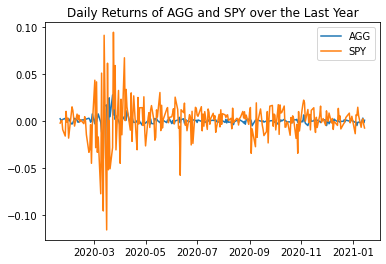

In [30]:
df_daily_returns.plot(title="Daily Returns of AGG and SPY over the Last Year")

In [31]:
my_agg = 200
my_spy = 50

agg_price = float(df_portfolio["AGG"]["close"][0])
spy_price = float(df_portfolio["SPY"]["close"][0])

In [32]:
agg_value = agg_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_price * df_shares.loc["SPY"]["shares"]

print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${agg_value:0.2f}")
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${spy_value:0.2f}")

The current value of the 200 AGG shares is $22616.00
The current value of the 50 SPY shares is $16600.50


Savings Health Analysis

In [33]:
monthly_income = 12000

amount_data = {
    "amount": [36384, 43660]
}

tickers = ["crypto", "shares"]

df_savings = pd.DataFrame(amount_data, index=tickers)
df_savings

,amount
crypto,36384
shares,43660


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

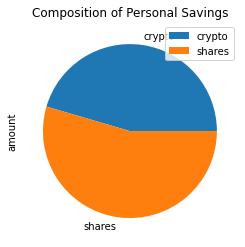

In [35]:
# labels = 'crypto', 'shares'
# sizes = [80, 150]
# colors = ['gold', 'yellowgreen']
# explode = (0, 0)  

# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
# autopct='%1.1f%%', shadow=True, startangle=140)

# plt.axis('equal')
# plt.show()

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [37]:
emergency_fund = monthly_income * 3
total_savings = float(df_savings.sum())
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("congratulation! You are achieving your financial goal")
else:
    amount_required = emergency_fund - total_savings
    print(f"You need ${amount_required} to reach your goal")    

Congratulations! You have enough money in your emergency fund


Monte Carlo Simulation

In [107]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [108]:
ticker = ['AGG', 'SPY']


start = pd.Timestamp("2016-01-17", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-01-17", tz="America/New_York").isoformat()

timeframe = "1D"

df_stock_data = api.get_barset(
    ticker,
    timeframe,
    start=start,
    end=end
).df

df_stock_data

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
...                           ...       ...       ...     ...      ...   
2021-01-11 00:00:00-05:00  117.02  117.0500  116.8900  116.89  5047096   
2021-01-12 00:00:00-05:00  116.82  116.9900  116.6800  116.98  5103382   
2021-01-13 00:00:00-05:00  117.63  117.6300  117.0800  117.36  5686592   
2021-01-14 00:00:00-05:00  117.37  117.4500  117.0800  117.15  5311077   
2021-01-15 00:00:00-05:00  117.34  117.3600  117.1800  117.26  4776104   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2016-01-19 00:00:00-05:00  189.96  190.11  186.2000  188.02  151482568  
2016-01-20 00:00:00-05:00  185.03  188.06  181.0200  185.79  245668486  
2016-01-21 00:00:00-05:00  186.21  188.87  184.6400  186.68  154918462  
2016-01-22 00:00:00-05:00  189.78  190.76  188.8800  190.49  132418951  
2016-01-25 00:00:00-05:00  189.93  190.15  187.4100  187.66   99219694  
...                           ...     ...       ...     ...        ...  
2021-01-11 00:00:00-05:00  377.85  380.58  377.7189  378.74   44814805  
2021-01-12 00:00:00-05:00  378.89  379.86  376.3600  378.81   45364896  
2021-01-13 00:00:00-05:00  378.69  380.86  377.8500  379.76   38355050  
2021-01-14 00:00:00-05:00  380.59  381.13  378.1000  378.45   41045335  
2021-01-15 00:00:00-05:00  376.72  377.58  373.7000  375.68   78405054  

[1259 rows x 10 columns]

In [109]:
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [114]:
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-19 00:00:00-05:00          NaN  189.96  190.11  186.20  188.02   
2016-01-20 00:00:00-05:00     0.001011  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   

                                                   
                              volume daily_return  
time                                               
2016-01-19 00:00:00-05:00  151482568          NaN  
2016-01-20 00:00:00-05:00  245668486    -0.011860  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856

In [111]:
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002250,1.002823,0.995232,1.010572,1.014751,1.017431,1.006923,1.000347,0.985453,1.000344,...,0.985187,1.000949,1.003275,0.997407,1.002623,1.002631,1.004162,1.000253,0.989902,1.007308
2,1.003203,1.008698,0.993175,1.008978,1.018218,1.018476,1.006195,1.003025,0.978284,0.997708,...,0.987437,0.996620,0.995680,1.002067,0.998254,0.996752,1.021981,0.999900,1.000132,0.999219
3,1.009427,1.005762,0.993169,1.007253,1.003391,1.022698,1.005531,1.016156,0.991569,0.976883,...,0.998667,0.997842,1.001880,0.997253,1.004626,1.000883,1.032164,0.993194,0.996052,1.003133
4,1.003015,0.998921,1.002146,1.004919,1.000445,1.036541,0.994261,1.015903,0.996048,0.980140,...,1.005824,0.988078,0.994874,0.994733,1.010437,0.998065,1.040083,1.005981,1.001698,1.000859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.983396,18.395120,42.368133,7.908815,13.040492,11.916705,15.853705,43.530181,17.209853,8.279485,...,8.913494,27.291318,24.411253,12.635766,25.886979,19.664459,12.646970,10.440965,11.811066,15.131692
7557,20.912528,18.456358,42.762148,7.789857,13.057483,11.902358,15.914468,43.949785,17.152909,8.325311,...,8.866749,27.181989,24.354574,12.776819,26.121571,19.510486,12.527653,10.425107,11.780768,15.161310
7558,20.647940,18.510715,42.985722,7.796290,13.134954,11.947586,15.904674,43.970607,17.119306,8.410789,...,8.802805,27.276440,23.973799,12.710127,26.372812,19.613516,12.361783,10.455216,11.712558,15.083527
7559,20.650864,18.685421,43.092942,7.759934,13.165567,12.095266,16.017182,44.216161,17.118154,8.479473,...,8.734866,27.347339,24.084148,12.619442,26.338448,19.570123,12.489473,10.371670,11.813832,15.012262


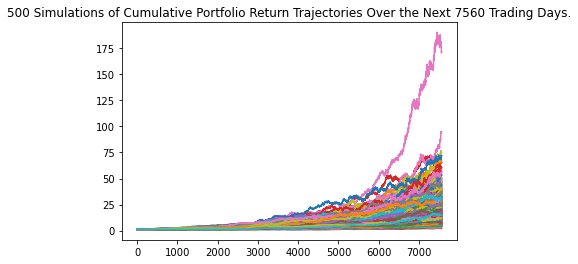

In [112]:
Line_plot = MC_thirtyyear.plot_simulation()

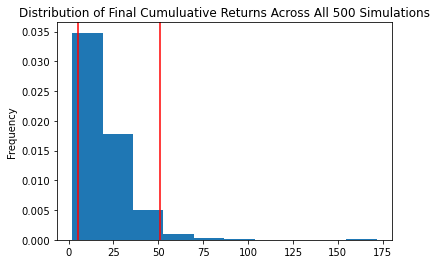

In [113]:
dist_plot = MC_thirtyyear.plot_distribution()

Retirememnt Analysis

In [54]:
tbl = MC_thirtyyear.summarize_cumulative_return()

print(tbl)

count           500.000000
mean             20.406741
std              14.488410
min               2.555774
25%              11.144888
50%              17.053942
75%              24.991510
max             160.919503
95% CI Lower      5.299111
95% CI Upper     56.691972
Name: 7560, dtype: float64


Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment

In [55]:
initial_investment = 20000

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $105982.23 and $1133839.45


Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [56]:
initial_investment = 20000 * 1.5

ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $158973.34 and $1700759.17


Optional Challenge - Early Retirement

Five Years Retirement Option

In [64]:
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [65]:
MC_fiveyear.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197.0   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040.0   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926.0   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-19 00:00:00-05:00          NaN  189.96  190.11  186.20  188.02   
2016-01-20 00:00:00-05:00     0.001011  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   

                                                   
                              volume daily_return  
time                                               
2016-01-19 00:00:00-05:00  151482568          NaN  
2016-01-20 00:00:00-05:00  245668486    -0.011860  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856

In [66]:
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010124,0.988760,0.997411,1.009293,1.007970,1.000679,1.005023,1.009045,1.001224,1.019029,...,0.996307,1.009025,1.003086,0.993881,0.994880,1.000376,1.005048,1.007666,1.008884,0.995426
2,1.020319,0.993204,1.006737,0.990428,1.017527,1.002856,0.997615,1.012052,0.996641,1.020427,...,0.982675,0.992045,0.996453,0.991700,1.001337,1.005063,1.016087,1.014437,0.997406,0.985313
3,1.008347,1.004009,1.014011,0.991716,1.016635,0.997759,1.003497,1.023406,0.996812,1.030458,...,0.972669,0.987825,0.995737,1.001817,1.007482,1.012263,1.020235,1.013953,0.998209,0.983544
4,1.010034,1.010347,1.019142,0.994929,1.004332,1.001067,1.000284,1.026657,1.002073,1.041957,...,0.985864,0.985253,1.000605,0.987645,1.007332,1.022211,1.008535,1.006171,1.000070,0.989645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.733052,2.142345,2.004343,1.460270,1.571615,1.346265,1.046642,1.938331,1.671982,1.289965,...,1.865616,1.909389,1.594961,1.476155,1.279136,1.847703,1.534881,1.126697,1.561067,2.079129
1257,1.740919,2.160526,2.003911,1.453592,1.562353,1.336106,1.050109,1.938015,1.672515,1.284827,...,1.872134,1.907324,1.619284,1.470920,1.281616,1.855782,1.546396,1.138670,1.539671,2.052622
1258,1.738992,2.166418,1.985500,1.471027,1.555953,1.337242,1.059274,1.957505,1.644568,1.304426,...,1.873370,1.899531,1.609373,1.479002,1.278997,1.841125,1.569748,1.152611,1.535894,2.064583
1259,1.747617,2.187587,2.002900,1.494405,1.542797,1.314275,1.057920,1.971765,1.628909,1.291692,...,1.869237,1.892510,1.615321,1.482827,1.280712,1.849567,1.558203,1.161178,1.534521,2.047411


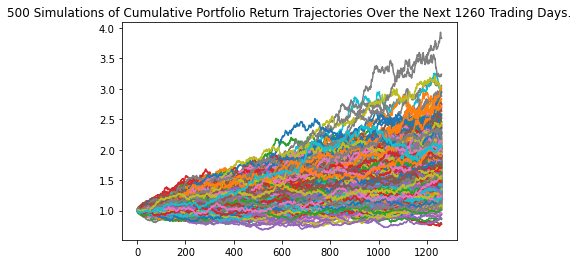

In [67]:
Line_plot = MC_fiveyear.plot_simulation()

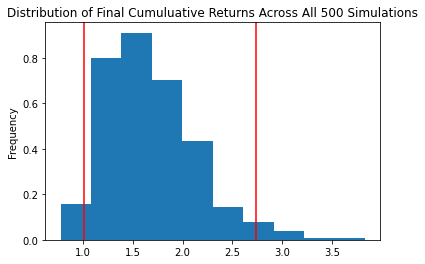

In [71]:
dist_plot = MC_fiveyear.plot_distribution()

In [115]:
tbl = MC_thirtyyear.summarize_cumulative_return()

print(tbl)

count           500.000000
mean             20.190508
std              14.254954
min               1.984514
25%              10.785146
50%              16.849008
75%              26.481877
max             171.519546
95% CI Lower      4.990157
95% CI Upper     50.758150
Name: 7560, dtype: float64


In [117]:
initial_investment = 60000

ci_lower = round(tbl[8]*60000,2)
ci_upper = round(tbl[9]*60000,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $299409.43 and $3045489.02


Ten Years Retirement Option

In [122]:
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [123]:
MC_tenyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-19 00:00:00-05:00          NaN  189.96  190.11  186.20  188.02   
2016-01-20 00:00:00-05:00     0.001011  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   

                                                   
                              volume daily_return  
time                                               
2016-01-19 00:00:00-05:00  151482568          NaN  
2016-01-20 00:00:00-05:00  245668486    -0.011860  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856

In [124]:
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994572,1.008572,0.988286,0.996007,1.004370,0.988597,0.995633,1.002058,1.011966,0.998229,...,1.008746,0.995096,0.998705,0.990629,0.995401,1.008850,1.011548,0.992470,1.003721,1.007894
2,0.993840,1.008078,0.984612,1.000152,0.990447,0.979458,0.993626,0.997940,1.012450,1.001430,...,1.002525,0.993096,0.982037,0.992134,0.989254,0.992808,1.028273,1.005692,1.000984,1.003551
3,0.990479,1.014793,0.982846,0.993339,0.985285,0.986603,0.990864,0.992774,1.009968,1.002237,...,1.009243,1.003639,0.988956,0.992967,0.988963,0.996574,1.030725,1.003462,0.998716,1.009625
4,0.982276,1.010231,0.972216,0.996386,0.993158,0.997506,1.009574,0.985787,1.006538,1.003490,...,1.010659,1.012456,0.986500,0.986638,0.993160,0.999992,1.020839,1.006388,0.995865,1.007698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.059982,1.443447,0.982050,3.053923,2.903922,1.962251,1.582706,2.342277,3.194975,1.385557,...,3.077579,2.983731,2.598083,1.548540,1.909415,2.141605,4.497623,2.605819,1.303332,2.651628
2517,3.070472,1.452287,0.993941,3.042776,2.899914,1.969056,1.587491,2.334771,3.208590,1.390617,...,3.107995,2.987314,2.588104,1.570590,1.906650,2.131564,4.519610,2.604868,1.292457,2.648455
2518,3.090267,1.451325,0.999677,3.035507,2.908870,1.969928,1.596214,2.359403,3.170300,1.394510,...,3.102128,2.980617,2.600365,1.591455,1.901069,2.126236,4.548080,2.588535,1.301246,2.653072
2519,3.109823,1.443220,1.005181,3.030540,2.941958,1.980009,1.613591,2.352551,3.218610,1.386437,...,3.103906,2.985701,2.643294,1.581118,1.901179,2.128796,4.533343,2.597238,1.292754,2.652711


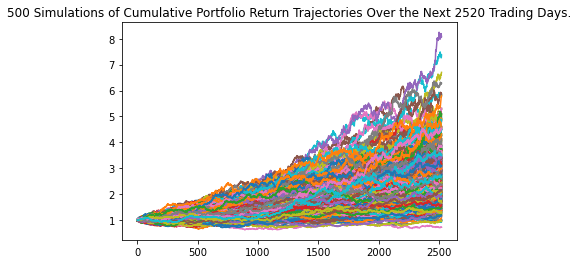

In [125]:
Line_plot = MC_tenyear.plot_simulation()

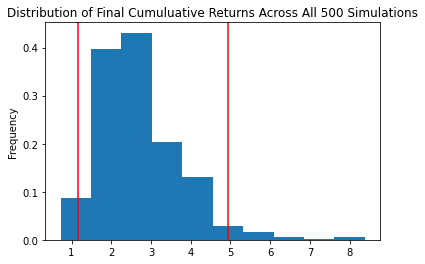

In [126]:
dist_plot = MC_fiveyear.plot_distribution()

In [127]:
tbl = MC_thirtyyear.summarize_cumulative_return()

print(tbl)

count           500.000000
mean             20.190508
std              14.254954
min               1.984514
25%              10.785146
50%              16.849008
75%              26.481877
max             171.519546
95% CI Lower      4.990157
95% CI Upper     50.758150
Name: 7560, dtype: float64


In [128]:
initial_investment = 60000

ci_lower = round(tbl[8]*60000,2)
ci_upper = round(tbl[9]*60000,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $299409.43 and $3045489.02
